# Simple data visualization: the bar chart

In this notebook we'll be comparing as many Python visualization libraries as possible with one simple metric: how easy is it to make a bar chart? We'll also look a bit into customization with each library, and explore the pain points a bit. 

_Note: if you're viewing this on GitHub, charting libraries that output Javascript (Bokeh, Holoviews, Altair) won't display. Try viewing the notebook on [my nbviewer page](http://nbviewer.jupyter.org/github/dovinmu/python-viz-notebooks/tree/master/) instead._

First, let's load a pandas DataFrame of the data we'll be using and clean it a bit. There's a CSV in the repository that lists over 4,000 cities and towns in the United States. For now, let's just take the cities that are over a certain size and plop that into various charting libraries. 

In [1]:
import pandas
%matplotlib inline

df = pandas.read_csv('data/US_cities.csv', index_col="AccentCity")
# select cities with a population greater than 750,000 and convert units to millions
large_cities = df[df["Population"] > 500000][["Population"]] / 1000000
# sort the list by population
large_cities.sort_values("Population", inplace=True)
# we don't care about all the other data, so discard everything but the population
large_cities_ser = large_cities["Population"]
# also don't care about the name of the cities column in the CSV
large_cities_ser.index.name = "Name"

large_cities

,Population
Name,
Tucson,0.518907
Nashville,0.530852
Oklahoma City,0.532950
Las Vegas,0.540111
Portland,0.540513
Washington,0.552433
Denver,0.555981
Seattle,0.569369
Boston,0.571281


We'll represent the population in the millions to make it so we don't have to fiddle with the y-axis of our plots. 

### Matplotlib
Matplotlib is both amazingly versatile, and also generally more verbose than the other packages below (which usually will use it as a backend rendering target for static graphs). You need to manually specify a few things that other packages just handle.

In [2]:
large_cities.index

Index(['Tucson', 'Nashville', 'Oklahoma City', 'Las Vegas', 'Portland',
       'Washington', 'Denver', 'Seattle', 'Boston', 'Milwaukee', 'El Paso',
       'Charlotte', 'Baltimore', 'Fort Worth', 'Memphis', 'Austin',
       'San Francisco', 'Columbus', 'Indianapolis', 'Jacksonville', 'Detroit',
       'San Jose', 'Dallas', 'San Antonio', 'San Diego', 'Phoenix',
       'Philadelphia', 'Houston', 'Chicago', 'Los Angeles', 'New York'],
      dtype='object', name='Name')

Text(0,0.5,'Population (m)')

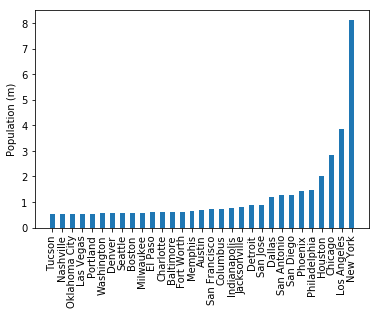

In [3]:
import matplotlib.pyplot as plt

# manually tell matplotlib where the bars will go, so we'll space them out every 10 pixels
left = [i * 10 for i in range(len(large_cities))]
cities = list(large_cities.values)
plt.bar(left, large_cities.Population, width=5, 
        tick_label=large_cities.index)
# make the city names vertical so we can read them
plt.xticks(rotation="vertical")
plt.ylabel("Population (m)")

And we get this decent-looking bar chart.

### Pandas + Matplotlib

Pandas is what we loaded the data in with, and it has plotting functions that use matplotlib as the backend but are aware of how your dataframe is structured. This is all we need to do to make an almost identical chart as the one above.

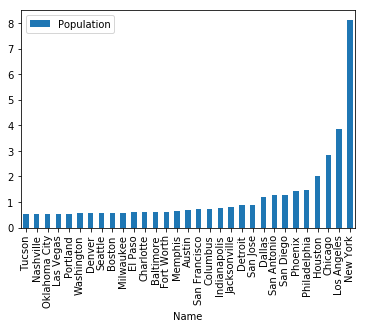

In [8]:
large_cities.plot.bar()

Because pandas is plotting to matplotlib on the backend, you can still tweak it with commands directly to matplotlib like in the second line above. 

### Seaborn

Text(0,0.5,'Population (m)')

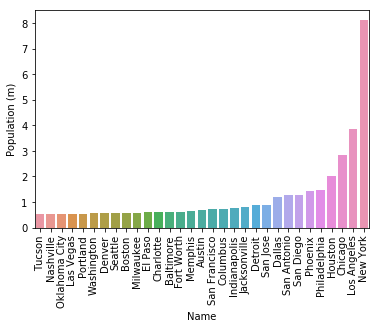

In [5]:
import seaborn
seaborn.barplot(x=large_cities.index, y=large_cities.Population)
plt.xticks(rotation="vertical")
plt.ylabel("Population (m)")

### Bokeh

Here's how to make a bar chart similar to the ones above in Bokeh.

In [6]:
from bokeh.io import show, output_notebook
from bokeh.plotting import figure

output_notebook()

p = figure(x_range=list(large_cities.index),  toolbar_location=None)
p.vbar(x='Name', top='Population', width=0.9, source=large_cities,  
       line_color='white')
p.xaxis.major_label_orientation = "vertical"

show(p)

Loading BokehJS ...

If we want the labels to be oriented the same way as we got above, we can do a neat trick by manually specifying the rotation. 

In [12]:
p.xaxis.major_label_orientation = 3.14159 / 2
show(p)

Thanks for reading!

### References

Bokeh bar chart: http://bokeh.pydata.org/en/latest/docs/gallery/bar_colormapped.html

Thanks to @bryevdv for dropping some knowledge about how to use Bokeh better.